# 2. Gaussian Mixtures

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

## In this exercise, you are required to implement Gaussian Mixtures for Soft Clustering using the Expectation Maximization (EM) Algorithm. We will use the same data as the one from the K-Means exercise.
#### 1. Initialize clusters by drawing randomly from a uniform distribution.
#### 2. Clearly specify the Expectation step and the Maximization step.

In [4]:
class GaussianMixtureModel:
    def __init__(self, n_clusters, max_iter=100, tol=1e-6):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.means = None
        self.covariances = None
        self.weights = None
        self.responsibilities = None
        self.log_likelihood = None
        
    def fit(self, X):
        n_samples, n_features = X.shape
        self.means = X[np.random.choice(n_samples, self.n_clusters), :]
        self.covariances = [np.cov(X.T) for _ in range(self.n_clusters)]
        self.weights = np.ones(self.n_clusters) / self.n_clusters
        self.responsibilities = np.zeros((n_samples, self.n_clusters))
        self.log_likelihood = []
        
        for i in range(self.max_iter):
            # Expectation step
            for j in range(self.n_clusters):
                # self.responsibilities[:, j] = self.weights[j] * multivariate_normal.pdf(X, mean=self.means[j], cov=self.covariances[j])
                self.responsibilities[:, j] = self.weights[j] * multivariate_normal.pdf(X, mean=self.means[j], cov=self.covariances[j])
            self.responsibilities /= np.sum(self.responsibilities, axis=1)[:, np.newaxis]
            
            # Maximization step
            for j in range(self.n_clusters):
                N_j = np.sum(self.responsibilities[:, j])
                self.means[j] = 1 / N_j * np.sum(self.responsibilities[:, j][:, np.newaxis] * X, axis=0)
                X_centered = X - self.means[j]
                self.covariances[j] = 1 / N_j * np.dot(X_centered.T, X_centered * self.responsibilities[:, j][:, np.newaxis])
                self.weights[j] = N_j / n_samples
            
            # Compute the log-likelihood
            log_likelihood = np.sum(np.log(np.sum(self.responsibilities, axis=1)))
            self.log_likelihood.append(log_likelihood)
            
            # Check for convergence
            if i > 0 and np.abs(log_likelihood - self.log_likelihood[-2]) < self.tol:
                break
                
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)
    
    def predict_proba(self, X):
        probability = np.zeros((X.shape[0], self.n_clusters))
        for j in range(self.n_clusters):
            probability[:, j] = self.weights[j] * multivariate_normal.pdf(X, mean=self.means[j], cov=self.covariances[j])
        probability /= np.sum(probability, axis=1)[:, np.newaxis]
        return probability



#### 3. Plot, a figure showing the selection of the best number of clusters K


In [8]:
def plot_selection_of_best_K(X, min_K=1, max_K=10):
    scores = []
    for K in range(min_K, max_K + 1):
        gmm = GaussianMixtureModel(n_clusters=K)
        gmm.fit(X)
        scores.append(gmm.log_likelihood[-1])
        
    plt.plot(range(min_K, max_K + 1), scores)
    plt.xlabel('Number of clusters K')
    plt.ylabel('Log-likelihood')
    plt.title("A figure showing the selection of the best number of clusters K")
    plt.show()


#### 4. Plot the optimal cluster by assigning points to the cluster with the highest responsibility (Hard Clustering) using PCA.

In [9]:
    
def plot_PCA(X, y_pred):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.title("PCA For 2 Components")
    plt.show()

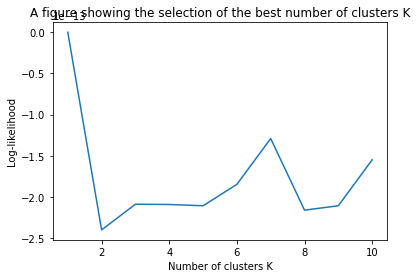

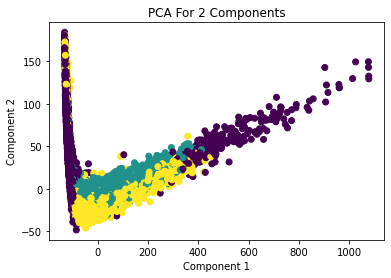

In [10]:

data = pd.read_csv('HTRU_2.csv',)
X = data.values

plot_selection_of_best_K(X)

gmm = GaussianMixtureModel(n_clusters=3)
gmm.fit(X)

proba = gmm.predict_proba(X)
y_pred = np.argmax(proba, axis=1)

plot_PCA(X, y_pred)